In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [2]:
stablo = load('stabla.joblib')
knn = load('knn.joblib')


In [9]:
models = stablo + knn

In [10]:
data = pd.read_csv("/home/ivana/Desktop/IP-projekat/2023_Data_Mining_Smoking_Dataset/datasets/data1.csv")
data.columns

Index(['Unnamed: 0', 'gender', 'age', 'height(cm)', 'weight(kg)',
       'eyesight(left)', 'hearing(left)', 'hearing(right)', 'relaxation',
       'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL',
       'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'Gtp',
       'dental caries', 'tartar', 'smoking'],
      dtype='object')

In [11]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [12]:
Y = data['smoking']
X = data.drop('smoking', axis=1)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=12)

/home/ivana/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/ivana/.local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


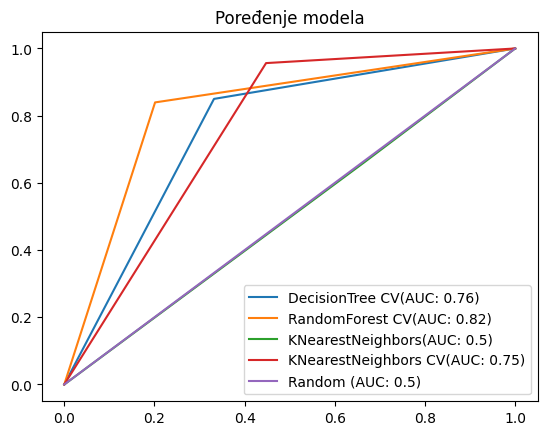

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

model_names = [ 'DecisionTree CV', 'RandomForest CV', 'KNearestNeighbors', 'KNearestNeighbors CV']

for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(AUC: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (AUC: 0.5)')
plt.title("Poređenje modela")
plt.legend()
plt.show()


Najbolji model je Random Forest sa podesenim parametrima, sa kojim smo uspeli da ostvarimo f1 score 80.5%, dok nista mnogo za njim ne zaostaje ni KNN sa podesenim parametrima gde smo postigli f1 score 80%.